# NYC Street Trees

* **Data:** `street-trees.csv`
* **Description:** Every five years New York City counts all of the trees that are planted on the streets of the city (not in parks).
* **Source:** https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh
* **Columns of interest:**
    * `tree_dbh` width of the tree's trunk, in inches. If it's `0`, it was not measured.
    * `stump_diam` width of the tree's stump, in inches (if the tree has been cut down). If it's `0`, it was not measured.
    * `curb` how close to the curb it is
    * `status` whether it is alive or not
    * `health` how healthy it is 
    * `spc_latin` the Latin/scientific name for the tree
    * `guards` whether guards are installed to protect it from trees/dogs/etc
    * `sidewalk` whether the roots have damaged the surrounding sidewalk
    * `zipcode` Five-digit zipcode in which tree is located
    * `borough` Name of borough in which tree is located
    * `nta_name` Name of neighborhood in which tree is located

## Read in your data

In [18]:
import pandas as pd
df = pd.read_csv("street-trees.csv")
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,}'.format)

## What is the percentage of alive vs dead trees?

In [19]:
#Finding out the percentage of the statuses of trees
df.status.value_counts(normalize=True) * 100

Alive    95.37649095918617
Stump    2.581794357315425
Dead    2.0417146834983946
Name: status, dtype: float64

## Filter your dataframe to only been trees that are still alive

In [20]:
alive_trees = df[df.status == 'Alive']
alive_trees

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,"1,027,431.14821","202,756.768749"
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,"1,034,455.70109","228,644.837379"
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,"1,001,822.83131","200,716.891267"
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,"1,002,420.35833","199,244.253136"
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,"990,913.775046","182,202.425999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,08/18/2015,155433,217978,POINT (-73.95494401022562 40.7132107823145),25.0,NaN,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.71321078,-73.95494401,"996,740.685965","199,121.636255"
683784,08/29/2015,183795,348185,POINT (-73.85665019989099 40.71519444267162),7.0,NaN,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.71519444,-73.8566502,"1,023,989.07438","199,873.647547"
683785,08/22/2015,166161,401670,POINT (-74.13651724205825 40.62076152739799),12.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.62076153,-74.13651724,"946,351.410431","165,466.07627"
683786,08/29/2015,184028,504204,POINT (-73.90311472453581 40.850828186655754),9.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.85082819,-73.90311472,"1,011,053.64553","249,271.950653"


## Where are these trees? Make a horizontal bar plot of the top five neighborhoods trees are located in, with the longest bar at the top.

<AxesSubplot:>

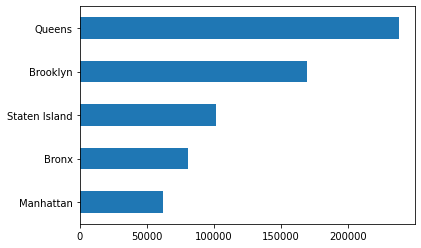

In [25]:
alive_trees.boroname.value_counts().sort_values().plot(kind='barh')

## For trees in Queens, what are the top 3 kinds of trees?

In [31]:
alive_trees[alive_trees.boroname == 'Queens'].spc_latin.value_counts().head(3)

Platanus x acerifolia                 31111
Quercus palustris                     22610
Gleditsia triacanthos var. inermis    20290
Name: spc_latin, dtype: int64

## What borough has the most trees in our dataset?

In [33]:
alive_trees.boroname.value_counts()

Queens           237974
Brooklyn         169744
Staten Island    101443
Bronx             80585
Manhattan         62427
Name: boroname, dtype: int64

## Save a CSV file of just trees in East Williamsburg, calling it `east-williamsburg.csv`

In [35]:
#Saving to csv requires filtering the data, and saving it into a df.
#Index = False is needed to remove unitended indexing 

east_williamsburg = alive_trees[alive_trees.nta_name == 'East Williamsburg']

east_williamsburg.to_csv("east-williamsburg.csv", index=False)

In [36]:
#Reading the file
pd.read_csv("east-williamsburg.csv")

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,Latitude,longitude,x_sp,y_sp
0,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,"1,001,822.83131","200,716.891267"
1,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,"1,002,420.35833","199,244.253136"
2,09/05/2015,204224,217797,POINT (-73.93895705650718 40.71308988154833),13.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,296 POWERS STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3048100,New York,40.71308988,-73.93895706,"1,001,172.71319","199,080.272493"
3,09/05/2015,204025,218365,POINT (-73.93663138986484 40.71763375446986),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.71763375,-73.93663139,"1,001,816.2516","200,736.201268"
4,08/19/2015,159658,216819,POINT (-73.94425848829616 40.70378287332874),8.0,NaN,OnCurb,Alive,Good,Magnolia grandiflora,southern magnolia,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,50 MANHATTAN AVENUE,11206,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3049100,New York,40.70378287,-73.94425849,"999,705.174458","195,688.469893"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,09/05/2015,204594,217950,POINT (-73.93792464138212 40.71378355661484),17.0,NaN,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,316 DEVOE STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3048100,New York,40.71378356,-73.93792464,"1,001,458.74674","199,333.200465"
2175,09/05/2015,203928,218162,POINT (-73.94120372879853 40.714777593020095),21.0,NaN,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,None,None,Damage,Volunteer,"Stones,RootOther,BranchLights",Yes,No,Yes,No,No,No,Yes,No,No,3 ORIENT AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3047700,New York,40.71477759,-73.94120373,"1,000,549.46378","199,694.73091"
2176,08/25/2015,174297,217297,POINT (-73.9450016370113 40.70826339560502),5.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,158 MANHATTAN AVENUE,11206,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3050500,New York,40.7082634,-73.94500164,"999,498.100397","197,320.728112"
2177,09/05/2015,204335,217969,POINT (-73.93422151547658 40.71360066150258),9.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NoDamage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.71360066,-73.93422152,"1,002,485.39003","199,267.315426"


## How many trees are elm trees?

Count both `American elm` and `Chinese elm`.

In [60]:
#creating a new data frame from where spc_common is American or Chinese elm
#Then counting the values of that df

elm_trees = alive_trees[(alive_trees.spc_common == 'Chinese elm') | (alive_trees.spc_common == 'American elm')]

elm_trees.spc_common.value_counts()

American elm    7975
Chinese elm     5345
Name: spc_common, dtype: int64

## Create a new column called `width_cm` that is the width of the tree trunk in centimeters

You'll probably get a warning about "A value is trying to be set on a copy of a slice from a DataFrame." That's fine! It just means that this is only applying to alive trees, not the original CSV that includes dead trees and stumps.

In [64]:
#Creating a new column to measure in cm. Cm to Inches conversion is * 2.54


df ['width_cm'] = df.tree_dbh * 2.54

In [65]:
df.width_cm

0         7.62
1        53.34
2         7.62
3         25.4
4        53.34
          ... 
683783    63.5
683784   17.78
683785   30.48
683786   22.86
683787   58.42
Name: width_cm, Length: 683788, dtype: float64

## What is the median trunk width, in centimeters?

In [71]:
#Taking the median of the new column

df.width_cm.median()

25.4

## What are the four narrowest trees in our dataset?

In [84]:
#First was to group the trees by their name
#Second, get their width in cm
#Third, get the median of the width and then sort it to show the narrowest
#Pick the four narrowest
df.groupby(by='spc_common').width_cm.median().sort_values().head(4)

spc_common
blackgum            5.08
Japanese snowbell   5.08
paperbark maple     5.08
arborvitae          7.62
Name: width_cm, dtype: float64

## What is the median trunk width, in centimeters, of trees that have damaged the sidewalk vs those who have not damaged the sidewalk?

In [95]:
#First step, group by sidewalk
#Second, pull out the width in cm and 
#Get out the median to indicate that of damage vs no damage
df.groupby(by='sidewalk').width_cm.median()

sidewalk
Damage     33.02
NoDamage   20.32
Name: width_cm, dtype: float64